In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
df = pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.describe(include='number')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


0
RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool


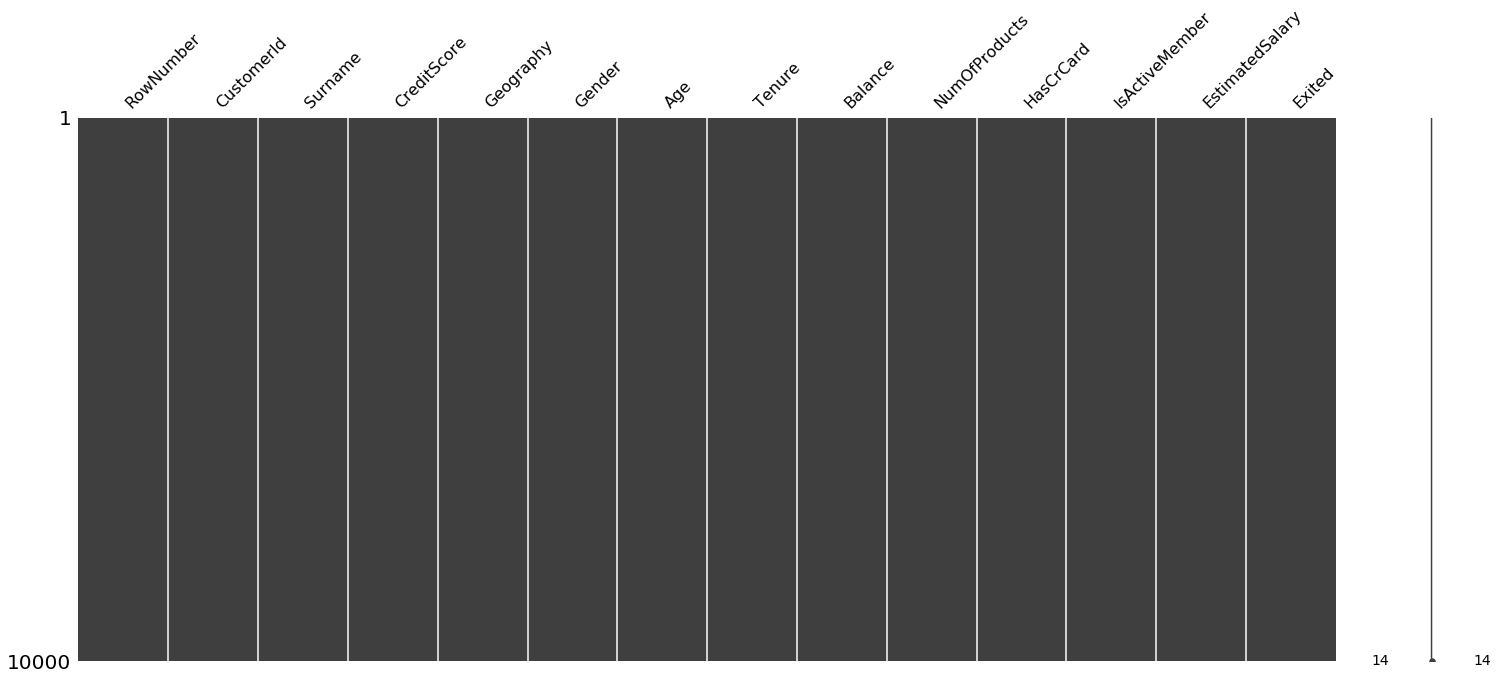

In [7]:
#check NULL
print(df.isnull().sum().sum())
print(df.isnull().any())
import missingno as msno
msno.matrix(df)

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.shape

(10000, 14)

In [10]:
#numberic_columns
f_columns = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

X = df.loc[:, f_columns].values
y = df.iloc[:, -1].values
print(X.shape, y.shape)

(10000, 8) (10000,)


In [11]:
#make train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 8), (8000,), (2000, 8), (2000,))

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

* **K-Nearest Neighbor**

In [13]:
#Fitting K-Nearest Neighbor Classification to the Training Set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5,metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Predicting the Test Set results
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_pred,y_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_KN = confusion_matrix(y_test, y_pred)
cm_KN

array([[1490,  105],
       [ 222,  183]])

In [14]:
#Performace with confusion metrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_KN = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Performance for K-Nearest Neighbor :")
print("\n Accuracy = " + str(accuracy_KN*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for K-Nearest Neighbor :

 Accuracy = 83.65 %

 Precision = 63.541666666666664 %

 Recall = 45.18518518518518 %

 f1 = 52.813852813852805 %


* **Support Vector Machine (SVM)**

In [15]:
# Fitting SVM to the Training Set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', degree = 3, random_state = 0) #degree for non-linear
classifier.fit(X_train, y_train) 

# Predicting the Test Set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_SVM_linear = confusion_matrix(y_test, y_pred)
cm_SVM_linear

array([[1595,    0],
       [ 405,    0]])

In [16]:
#Performace with confusion metrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_li = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Performance for Support Vector Machine (Linear) :")
print("\n Accuracy = " + str(accuracy_li*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for Support Vector Machine (Linear) :

 Accuracy = 79.75 %

 Precision = 0.0 %

 Recall = 0.0 %

 f1 = 0.0 %


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
# Fitting SVM to the Training Set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', degree = 5, random_state = 0) #degree for non-linear
classifier.fit(X_train, y_train) 

# Predicting the Test Set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_SVM_poly = confusion_matrix(y_test, y_pred)
cm_SVM_poly

array([[1566,   29],
       [ 261,  144]])

In [18]:
#Performace with confusion metrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_poly = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Performance for Support Vector Machine (Poly) :")
print("\n Accuracy = " + str(accuracy_poly*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for Support Vector Machine (Poly) :

 Accuracy = 85.5 %

 Precision = 83.23699421965318 %

 Recall = 35.55555555555556 %

 f1 = 49.82698961937716 %


* Naive Bayes

In [19]:
# Fitting Naive Bayes to the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test Set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred)
cm_NB

array([[1556,   39],
       [ 303,  102]])

In [20]:
#Performace with confusion metrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_nb = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Performance for Naive Bayes :")
print("\n Accuracy = " + str(accuracy_nb*100), '%')
print("\n Precision = " + str(precision*100),'%')
print("\n Recall = " + str(recall*100),'%')
print("\n f1 = " + str(f1*100),'%')

Performance for Naive Bayes :

 Accuracy = 82.89999999999999 %

 Precision = 72.3404255319149 %

 Recall = 25.185185185185183 %

 f1 = 37.36263736263736 %


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


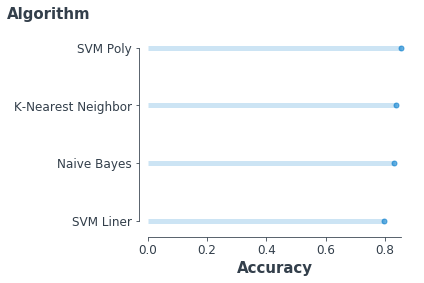

In [21]:
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# create some fake data
percentages = pd.Series([accuracy_KN,accuracy_li,accuracy_poly,accuracy_nb], 
                        index=['K-Nearest Neighbor','SVM Liner','SVM Poly','Naive Bayes'])
df = pd.DataFrame({'percentage' : percentages})
df = df.sort_values(by='percentage')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['percentage'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['percentage'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Accuracy', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Algorithm', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))